# Housing Price Prediction Model

### Keras Regression and Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

## Part 1

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# check if there is any missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


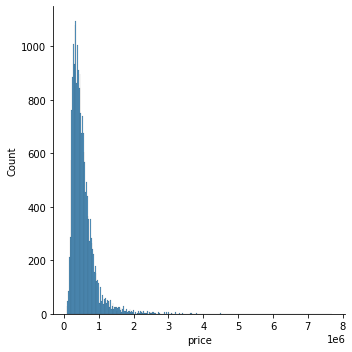

In [8]:
sns.displot(df['price']);

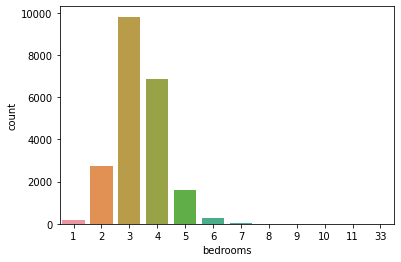

In [10]:
sns.countplot(data=df, x='bedrooms');

In [12]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

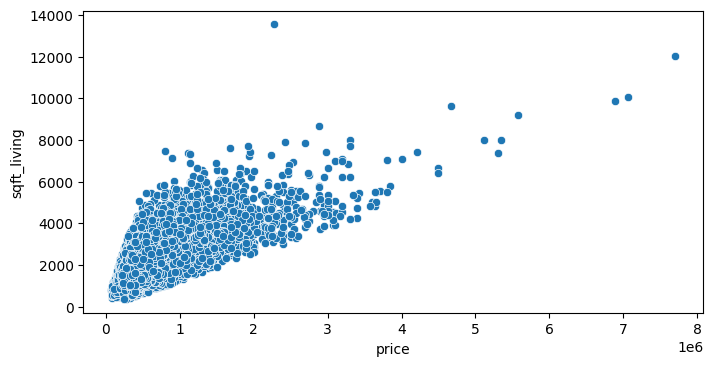

In [13]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(x='price', y='sqft_living', data=df);

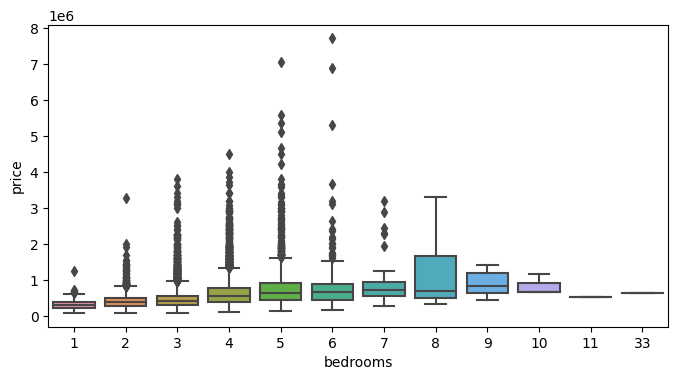

In [15]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(x='bedrooms', y='price', data=df);

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

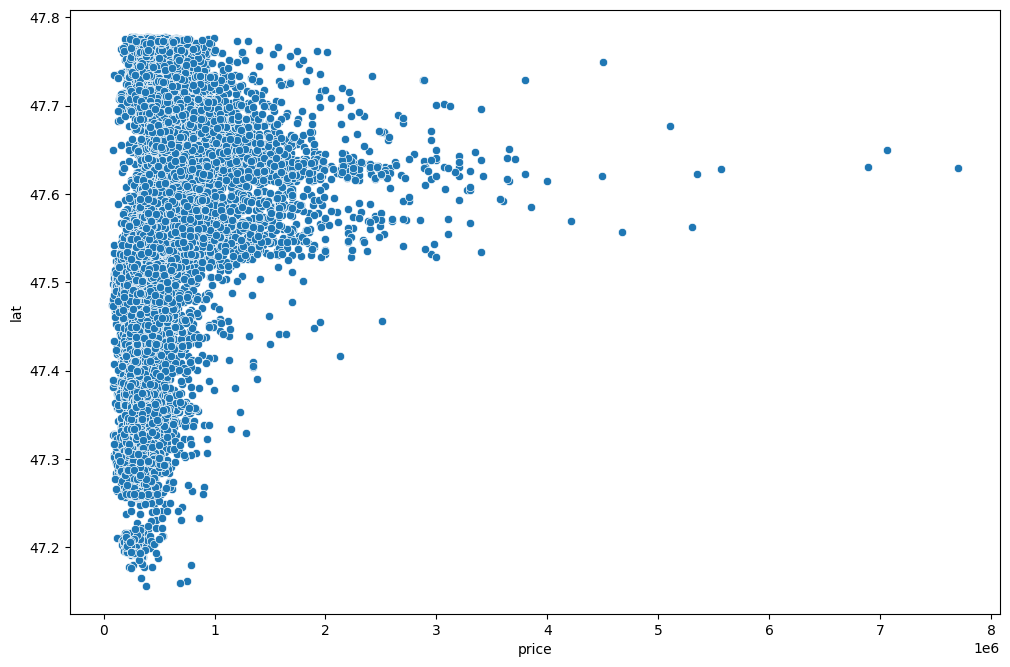

In [21]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='price', y='lat', data=df);

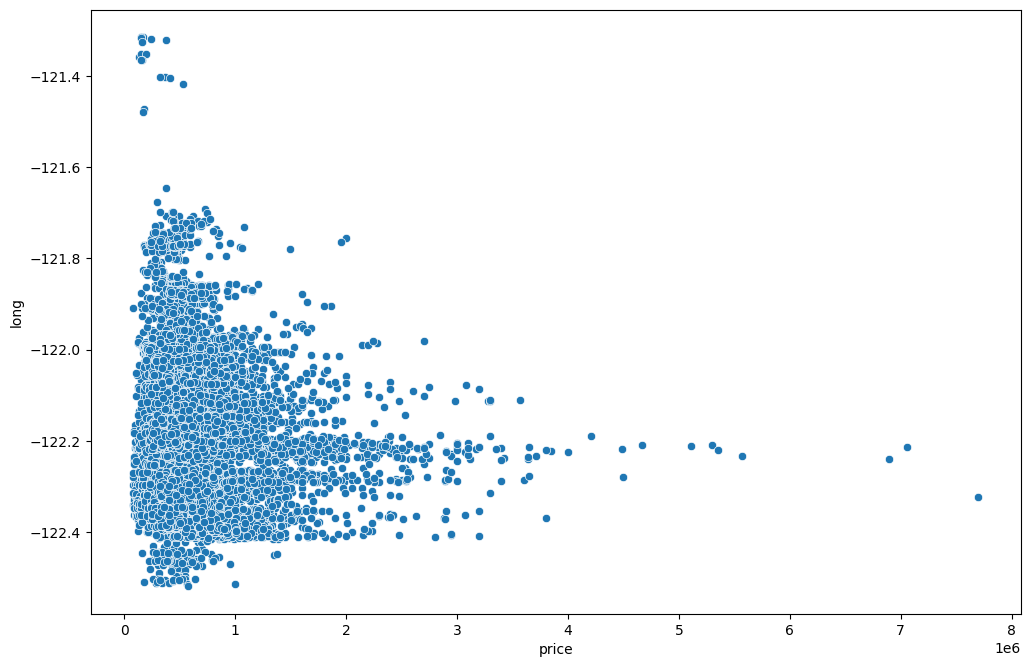

In [22]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='price', y='long', data=df);

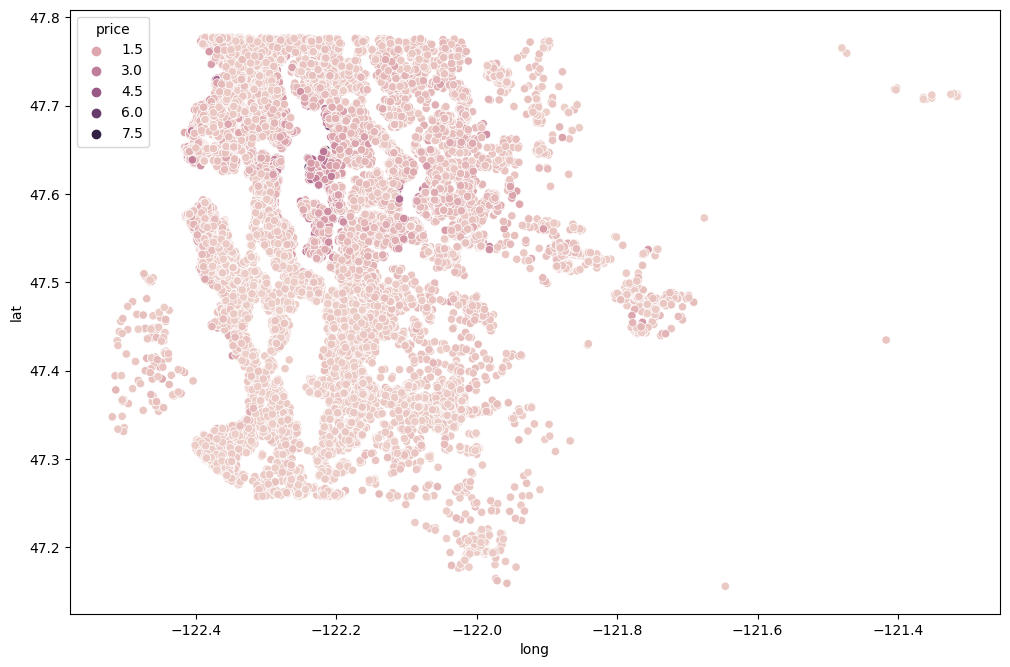

In [23]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [24]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [26]:
len(df) * 0.01

215.97

In [27]:
df_99p = df.sort_values('price', ascending=False).iloc[216:]

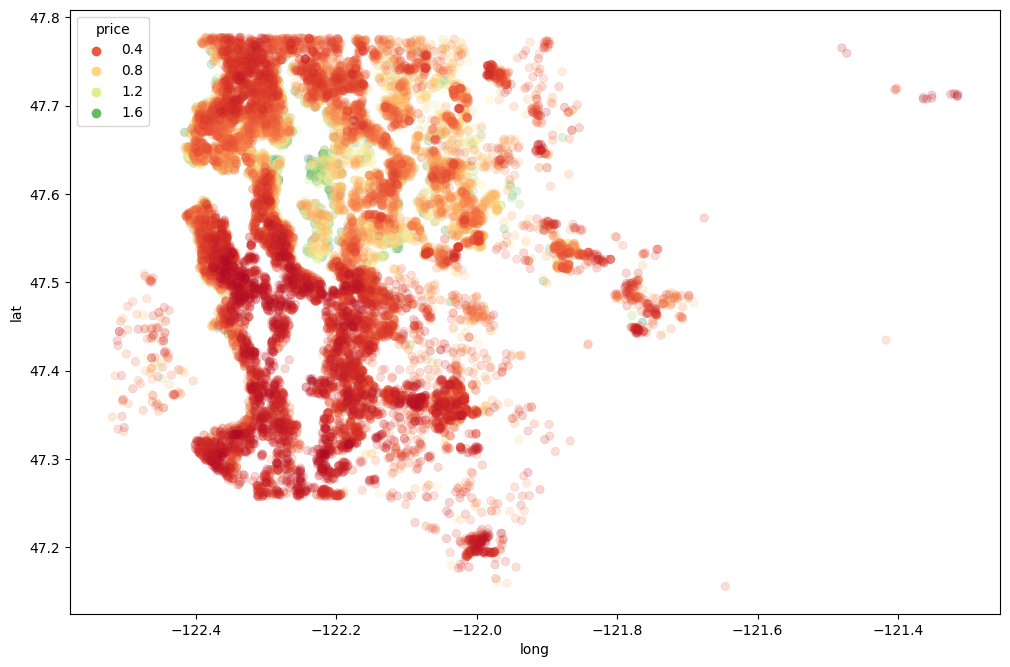

In [29]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='long', y='lat', data=df_99p,
                edgecolor=None,
                alpha=0.2,
                palette='RdYlGn',
                hue='price');

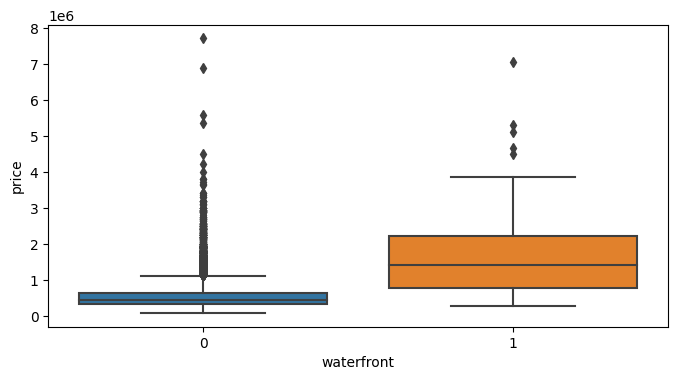

In [30]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(x='waterfront', y='price', data=df);

## Part 2

In [31]:
df = df.drop('id', axis=1)

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [36]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [37]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


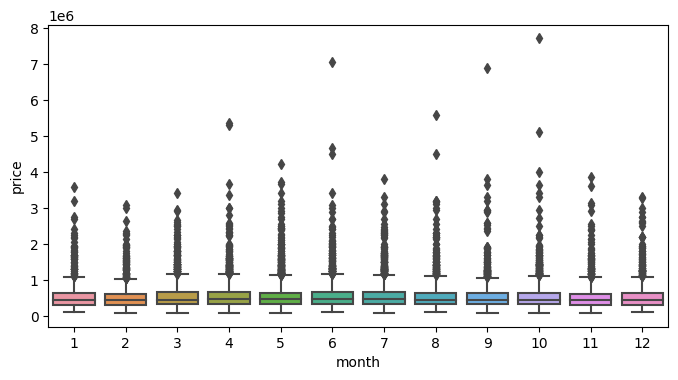

In [39]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(x='month', y='price', data=df);

In [40]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

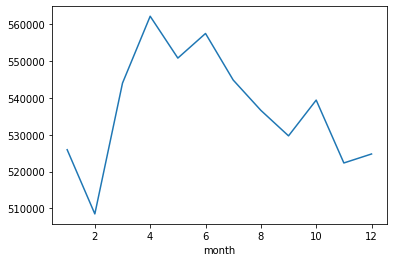

In [42]:
df.groupby('month').mean()['price'].plot();

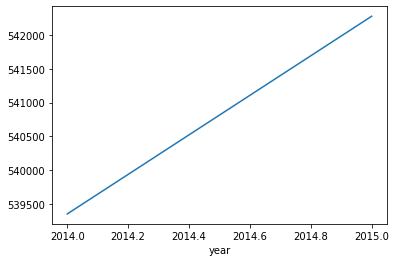

In [43]:
df.groupby('year').mean()['price'].plot();

In [44]:
df = df.drop('date', axis=1)

In [45]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [46]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [47]:
# too many dummy variables to create from the zipcode (so we will drop it)
df = df.drop('zipcode', axis=1)

In [48]:
# one option for feature engineering would be to categorize this data into renovated (1) and not-renovated (0)
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

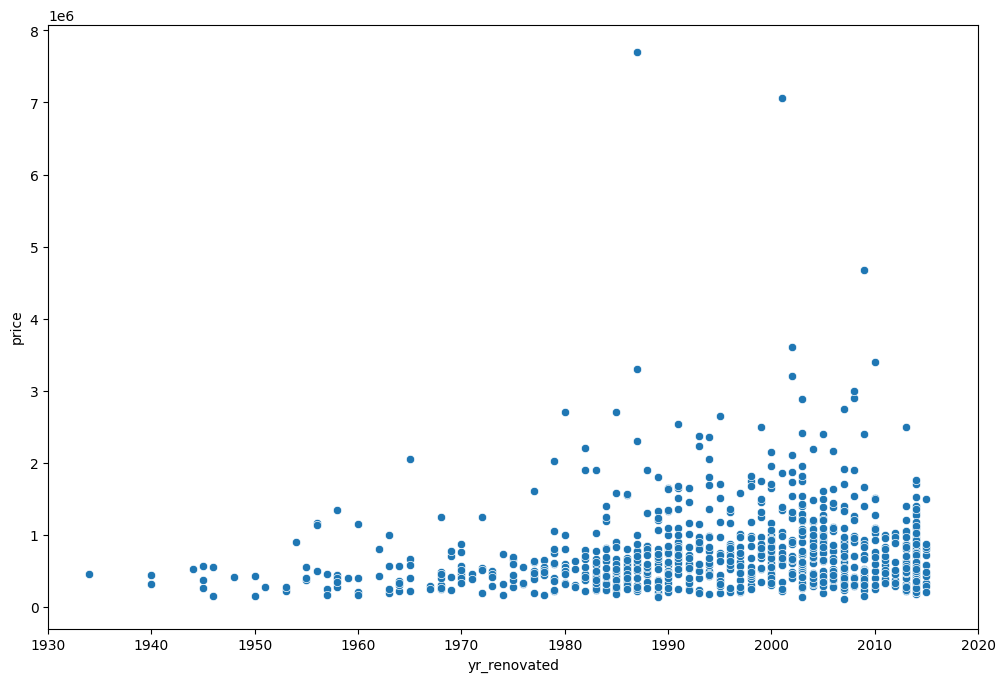

In [53]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='yr_renovated', y='price', data=df)
plt.xlim(1930, 2020);

In [54]:
# we will leave this one as is: 0 meaning 0 sq ft and therefore lower value, higher => increased price
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

## Define Features and Targets for ML Algorithm

In [55]:
# import to call "values" in order to get Numpy arrays for TF2
X = df.drop('price', axis=1).values
y = df['price'].values

**Train-test Split**

In [62]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Data Scaling**

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [61]:
X_test = scaler.transform(X_test)

## Deinfe the Neural Network Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
X_train.shape

(15117, 19)

In [66]:
# build the model
model = Sequential()

# add layers to our NN
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# output layer
model.add(Dense(1))

# compile
model.compile(optimizer='adam', loss='mse')

In [67]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 7s 30ms/step - loss: 427676517717.3333 - val_loss: 418838609920.0000
Epoch 2/400
119/119 [==============================] - 1s 7ms/step - loss: 419916759313.0667 - val_loss: 412616065024.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 421254449288.5333 - val_loss: 361757245440.0000
Epoch 4/400
119/119 [==============================] - 1s 7ms/step - loss: 349246128128.0000 - val_loss: 211878199296.0000
Epoch 5/400
119/119 [==============================] - 1s 7ms/step - loss: 174011699336.5333 - val_loss: 101110595584.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 94969889860.2667 - val_loss: 94457856000.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 100771739648.0000 - val_loss: 92723355648.0000
Epoch 8/400
119/119 [==============================] - 1s 6ms/step - loss: 98364360430.9333 - val_loss: 90861527040.0000
Epoch 9/400
119/119 

119/119 [==============================] - 1s 7ms/step - loss: 36788404548.2667 - val_loss: 35403849728.0000
Epoch 69/400
119/119 [==============================] - 1s 7ms/step - loss: 35505506406.4000 - val_loss: 35343286272.0000
Epoch 70/400
119/119 [==============================] - 1s 5ms/step - loss: 34749230813.8667 - val_loss: 35250372608.0000
Epoch 71/400
119/119 [==============================] - 1s 7ms/step - loss: 36340260386.1333 - val_loss: 35075223552.0000
Epoch 72/400
119/119 [==============================] - 1s 7ms/step - loss: 37608812288.0000 - val_loss: 34976161792.0000
Epoch 73/400
119/119 [==============================] - 1s 5ms/step - loss: 35523256251.7333 - val_loss: 34857943040.0000
Epoch 74/400
119/119 [==============================] - 0s 4ms/step - loss: 35550174566.4000 - val_loss: 34773774336.0000
Epoch 75/400
119/119 [==============================] - 1s 4ms/step - loss: 34905183436.8000 - val_loss: 34684461056.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 1s 6ms/step - loss: 32321465702.4000 - val_loss: 31606636544.0000
Epoch 136/400
119/119 [==============================] - 1s 5ms/step - loss: 33047798562.1333 - val_loss: 31536500736.0000
Epoch 137/400
119/119 [==============================] - 1s 5ms/step - loss: 33570286011.7333 - val_loss: 31523176448.0000
Epoch 138/400
119/119 [==============================] - 1s 5ms/step - loss: 33370547865.6000 - val_loss: 31477970944.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33769248000.0000 - val_loss: 31461148672.0000
Epoch 140/400
119/119 [==============================] - 1s 5ms/step - loss: 33241739434.6667 - val_loss: 31424540672.0000
Epoch 141/400
119/119 [==============================] - 1s 7ms/step - loss: 32820114278.4000 - val_loss: 31362220032.0000
Epoch 142/400
119/119 [==============================] - 1s 7ms/step - loss: 31818466133.3333 - val_loss: 31325579264.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 32814559863.4667 - val_loss: 29683724288.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 32161234432.0000 - val_loss: 29715644416.0000
Epoch 203/400
119/119 [==============================] - ETA: 0s - loss: 30585781527.272 - 0s 3ms/step - loss: 30659640866.1333 - val_loss: 29766131712.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31579184076.8000 - val_loss: 29649387520.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31217684070.4000 - val_loss: 29627142144.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31148188330.6667 - val_loss: 29580707840.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 30169249314.1333 - val_loss: 29630892032.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 32868887910.4000 - val_loss: 29553508352.0

119/119 [==============================] - 1s 5ms/step - loss: 31999386368.0000 - val_loss: 28702468096.0000
Epoch 268/400
119/119 [==============================] - 1s 6ms/step - loss: 31997675076.2667 - val_loss: 28699815936.0000
Epoch 269/400
119/119 [==============================] - 1s 6ms/step - loss: 31353061819.7333 - val_loss: 28700217344.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 31987840426.6667 - val_loss: 28655159296.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 33629696819.2000 - val_loss: 28652713984.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 30798300296.5333 - val_loss: 28650809344.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 31022503970.1333 - val_loss: 28796164096.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 28732663040.0000 - val_loss: 28688709632.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 29462929834.6667 - val_loss: 28017117184.0000
Epoch 334/400
119/119 [==============================] - 1s 6ms/step - loss: 30121742233.6000 - val_loss: 28006467584.0000
Epoch 335/400
119/119 [==============================] - 1s 6ms/step - loss: 30167847150.9333 - val_loss: 28078196736.0000
Epoch 336/400
119/119 [==============================] - 1s 6ms/step - loss: 31028776294.4000 - val_loss: 27983276032.0000
Epoch 337/400
119/119 [==============================] - 1s 5ms/step - loss: 30433831389.8667 - val_loss: 27963092992.0000
Epoch 338/400
119/119 [==============================] - 1s 6ms/step - loss: 30260818619.7333 - val_loss: 28051648512.0000
Epoch 339/400
119/119 [==============================] - 1s 6ms/step - loss: 32027843225.6000 - val_loss: 27986364416.0000
Epoch 340/400
119/119 [==============================] - 1s 5ms/step - loss: 30145086156.8000 - val_loss: 27948566528.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 29289570201.6000 - val_loss: 27675860992.0000
Epoch 400/400
119/119 [==============================] - 1s 6ms/step - loss: 30212408866.1333 - val_loss: 27410708480.0000


In [68]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302272e+11,4.188386e+11
1,4.283358e+11,4.126161e+11
2,4.053434e+11,3.617572e+11
3,3.051315e+11,2.118782e+11
4,1.490826e+11,1.011106e+11
...,...,...
395,2.973883e+10,2.748364e+10
396,2.971059e+10,2.741471e+10
397,2.966617e+10,2.748881e+10
398,2.967799e+10,2.767586e+10


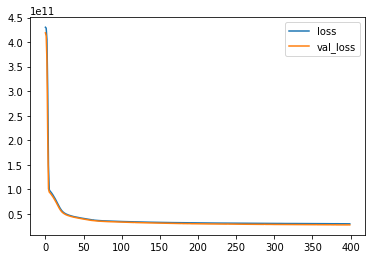

In [69]:
# important to check the validation loss to see if there is overfitting (!!)
losses = pd.DataFrame(model.history.history)
losses.plot();

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [71]:
y_pred = model.predict(X_test)

In [72]:
# RMS Error
np.sqrt(mean_squared_error(y_test, y_pred))

165561.8027252384

In [73]:
mean_absolute_error(y_test, y_pred)

102119.74345823689

In [74]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [75]:
explained_variance_score(y_test, y_pred)

0.7933888606418869

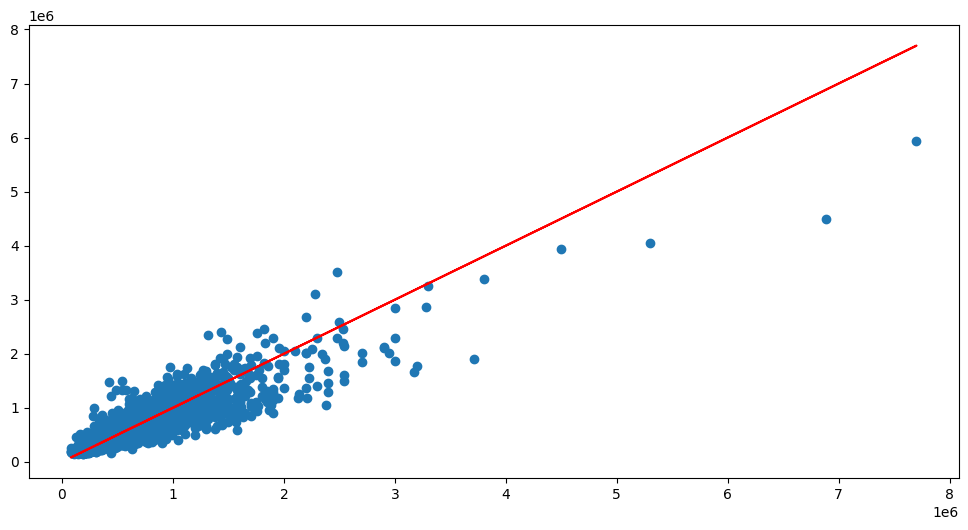

In [76]:
plt.figure(figsize=(12,6), dpi=100)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r-')
plt.show()

In [79]:
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [80]:
one_house = df.drop('price', axis=1).iloc[0]

In [84]:
x = scaler.transform(one_house.values.reshape(-1,19))

In [88]:
# Check House #1 Prediction
model.predict(x)

array([284288.6], dtype=float32)

In [87]:
# Check House #1 Actual Value
df.head(1)['price']

0    221900.0
Name: price, dtype: float64